# Histogram Equalization

## Common Imports

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive
import ipywidgets as widgets

## Basic 4x4 Example

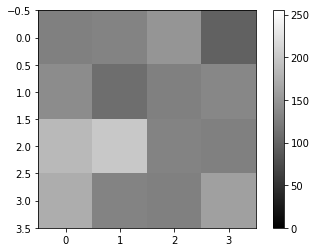

In [2]:
example = np.float32([
    [128, 132, 149, 98],
    [140, 110, 128, 135],
    [185, 200, 132, 128],
    [173, 132, 128, 160],
])

fig, ax = plt.subplots()
im = ax.imshow(example, cmap='gray', vmin=0, vmax=255)
fig.colorbar(im)
plt.show()


## Histogram as PDF

<BarContainer object of 256 artists>

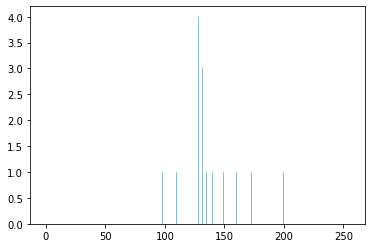

In [13]:
def compute_hist(img):
    hist = [0]*256
    for i in range(0,256):
        hist[i] = np.sum(np.int32(img)==i)
    return hist

hist = compute_hist(example)
plt.bar (np.arange(256), hist)

# Accumulative Histogram as CDF

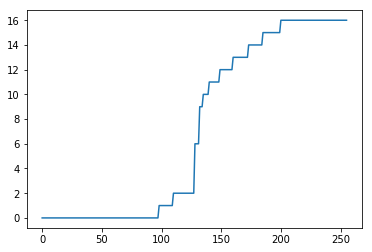

In [4]:
def compute_cdf (hist):
    cdf = np.float32(np.zeros((256,1)))
    cdf[0] = hist[0]
    for i in range (1, 256):
        cdf[i] = cdf[i-1] + hist[i]
    return cdf

cdf = compute_cdf(hist)
plt.plot(cdf)

## Backprojection

\begin{equation*}
bp_v = \frac{cdf_v - cdf_{min}}{cdf_{max} - cdf_{min}}*(L-1)
\end{equation*}

with $L$ as the number of possible levels in the image.

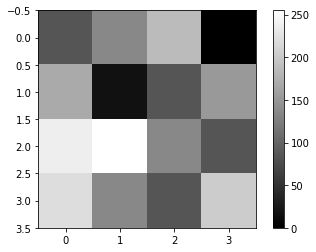

min = 0.0
max =  255.0


In [5]:
def backproject(value, cdf):
    L = cdf.shape[0]
    cdf_min = cdf[np.where(cdf != 0)[0][0]]
    cdf_max = cdf[L-1]
    

    cdf_cur = cdf[value]    
    ret = ((cdf_cur - cdf_min)/(cdf_max - cdf_min))*(L-1)
    
    return ret

def equalize (img, cdf):
    eq = np.zeros(img.shape)
    for row in range(eq.shape[0]):
        for col in range(eq.shape[1]):
            eq[row,col] = backproject(int(img[row,col]), cdf)
    return eq

eq = equalize (example, cdf)
fig, ax = plt.subplots()
im = ax.imshow(eq, cmap='gray', vmin=0, vmax=255)
fig.colorbar(im)
plt.show()

print("min =", eq.min())
print("max = ", eq.max())

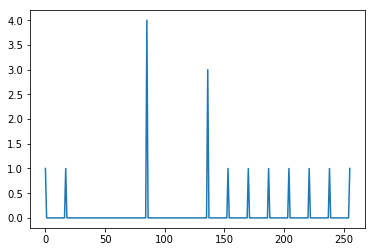

In [6]:
hist_eq = compute_hist(eq)
plt.plot (hist_eq)

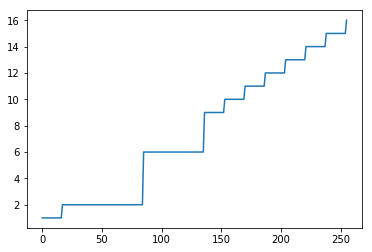

In [7]:
cdf_eq = compute_cdf(hist_eq)
plt.plot(cdf_eq)

## Histogram Equalization of Image

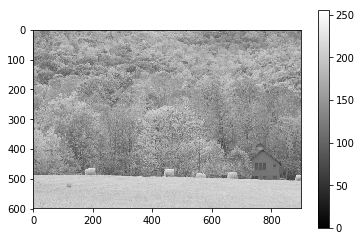

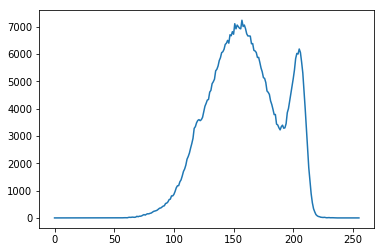

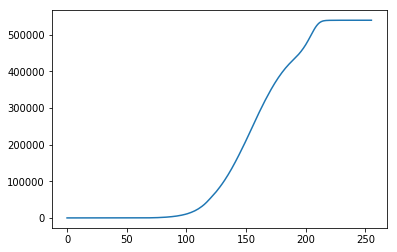

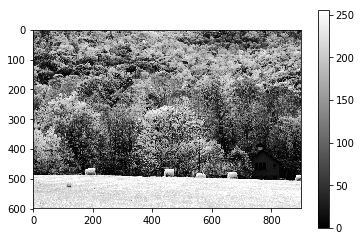

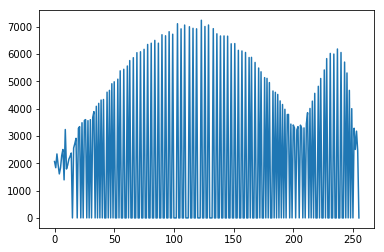

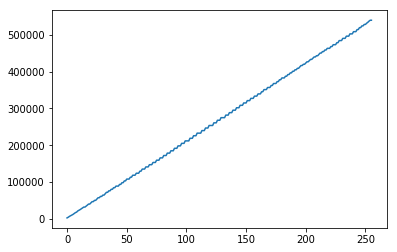

In [9]:
img = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)
img_hist = compute_hist(img)
img_cdf = compute_cdf (img_hist)

fig, ax = plt.subplots()
im = ax.imshow(img, cmap='gray', vmin=0, vmax=255)
fig.colorbar(im)
plt.show()

plt.plot(img_hist)
plt.show()
plt.plot(img_cdf)
plt.show()

img_eq = equalize(img, img_cdf)
img_eq_hist = compute_hist(img_eq)
img_eq_cdf = compute_cdf (img_eq_hist)

fig, ax = plt.subplots()
im = ax.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
fig.colorbar(im)
plt.show()

plt.plot(img_eq_hist)
plt.show()
plt.plot(img_eq_cdf)
plt.show()


# Histogram Equalization with OpenCV

<Figure size 432x288 with 0 Axes>

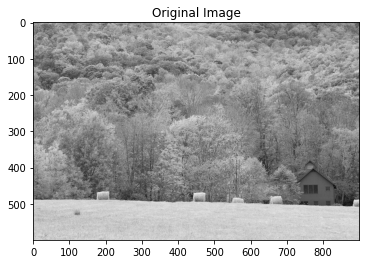

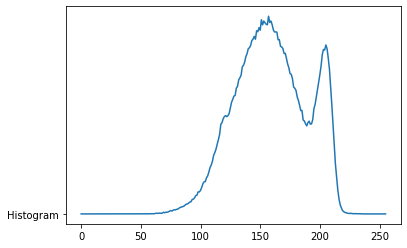

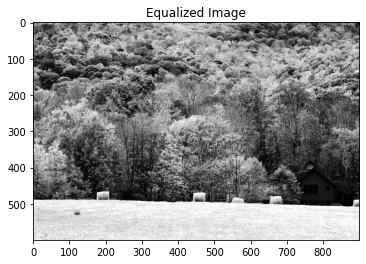

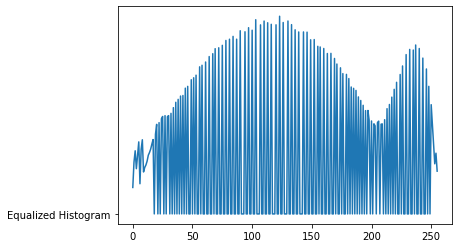

<Figure size 432x288 with 0 Axes>

In [14]:
ls = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)
ls_hist = cv2.calcHist([ls],[0],None,[256],[0,256])

plt.imshow(ls, cmap='gray')
plt.title('Original Image')
plt.figure()

plt.plot (ls_hist)
plt.plot('Histogram')
plt.figure()

# Equalize and display new image and histogram
ls_eq = cv2.equalizeHist(ls)
ls_eq_hist = cv2.calcHist([ls_eq],[0],None,[256],[0,256])

plt.imshow(ls_eq, cmap='gray')
plt.title('Equalized Image')
plt.figure()

plt.plot (ls_eq_hist)
plt.plot('Equalized Histogram')
plt.figure()

# Intensity Transformation Practice
Let's practice implementing other simple intensity transformations given by the general form:

\begin{equation*}
g(x,y) = T\left[f(x,y)\right]
\end{equation*}
\begin{equation*}
s = T\left[r\right]
\end{equation*}

## Normalization
For an 8 bit image with $L=256$
\begin{equation*}
s = \frac{r}{L-1}
\end{equation*}

In [15]:
#### TODO

## Negation
For an 8 bit image with $L=256$
\begin{equation*}
s = L-1-r
\end{equation*}

In [ ]:
### TODO

## Logarithmic Mapping
For an 8 bit image with $L=256$
\begin{equation*}
s = c\log{(1+r)}
\end{equation*}

<Figure size 432x288 with 0 Axes>

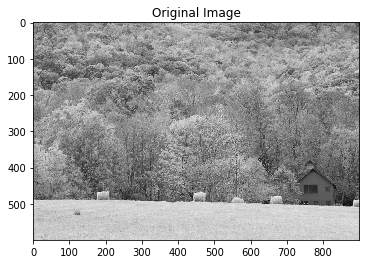

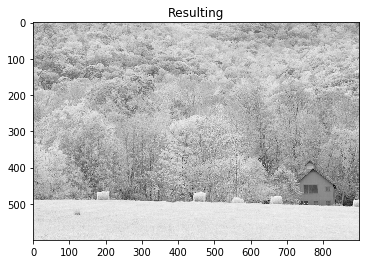

<Figure size 432x288 with 0 Axes>

In [56]:
img = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.figure()

c = 750

img2 = c * np.log(img  + 1)
img2 = img2.astype("int")

plt.imshow(img2, cmap='gray')
plt.title('Resulting')
plt.figure()

## Gamma Transformation
For an 8 bit image with $L=256$
\begin{equation*}
s = cr^\gamma
\end{equation*}

<Figure size 432x288 with 0 Axes>

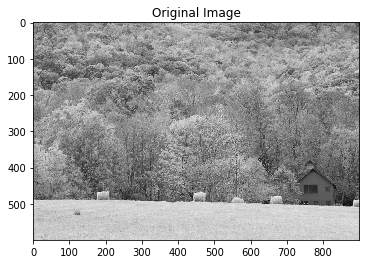

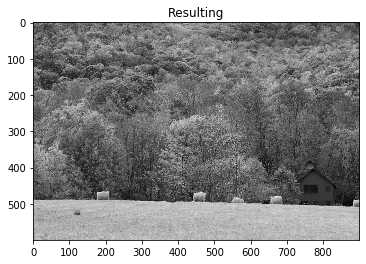

<Figure size 432x288 with 0 Axes>

In [39]:
img = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.figure()

c = 0.1
gamma = 1.9

img = c * img ** gamma

plt.imshow(img, cmap='gray')
plt.title('Resulting')
plt.figure()

## Binary Thresholding
For an 8 bit image with $L=256$
\begin{equation*}
s = \left\{
\begin{array}{ll}
0 && \text{if} \mspace{1em} r \lt \tau\\
1 && \text{if} \mspace{1em} r \ge \tau\\
\end{array}
\right.
\end{equation*}

<Figure size 432x288 with 0 Axes>

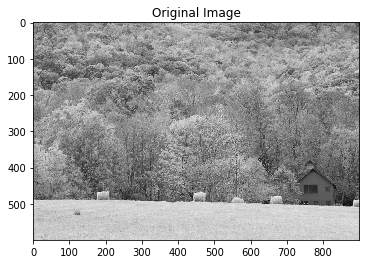

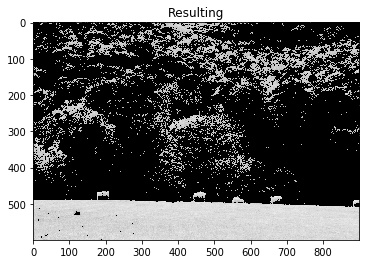

<Figure size 432x288 with 0 Axes>

In [45]:
img = cv2.imread('landscape.jpeg', cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.figure()

tau = 175

#img[img > tau] = 1
img[img <= tau] = 0

plt.imshow(img, cmap='gray')
plt.title('Resulting')
plt.figure()